# Project 2 - Ensembles

## 1.  Load all libraries

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## 2.  Load Dataset

In [10]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3.  Exploratory Data Analysis

In [11]:
df.dtypes
# age, balance, duration, campaign, pdays, previous are the only integer types
# job, marital, education, housing, loan, contact, outcome are categorical variables.
# day, month represents a column together. 
# target is the predictive column that would be our label column. 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [12]:
df.describe().transpose

<bound method DataFrame.transpose of                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0

In [13]:
#Analysis for Target Column 
df.Target.value_counts() # No - 39922; Yes - 5289; Certainly an unbalanced dataset.

no     39922
yes     5289
Name: Target, dtype: int64

## 4. Univariate Analysis

Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

### 4.a. Box Plot

In [14]:
def BoxPlot(df, col):
    d = pd.DataFrame(df[col].describe()).transpose()
    iqr = d['75%'][0]-d['25%'][0]
    mx = d['max'][0]
    print('===> Analysis for {0}; Length - {1}'.format(col, len(df)))
    print(d)
    print('IQR - {0}, {1}, {2}'.format(iqr, 
                                       d['75%'][0]+iqr*1.5, 
                                       len(df[df[col] > d['75%'][0]+iqr*1.5])))
    del(d)
    fig = plt.figure(figsize=(8,4))
    sb.boxplot(df[col])
    plt.show()
    plt.close(fig)

### 4.b. Count Plot

In [15]:
def CountPlot(df, col):
    ## Job details
    fig = plt.figure(figsize=(7,4))
    sb.countplot(y=col, data=df, hue='Target', )
    plt.show()
    plt.close(fig)

===> Analysis for age; Length - 45211
       count      mean        std   min   25%   50%   75%   max
age  45211.0  40.93621  10.618762  18.0  33.0  39.0  48.0  95.0
IQR - 15.0, 70.5, 487


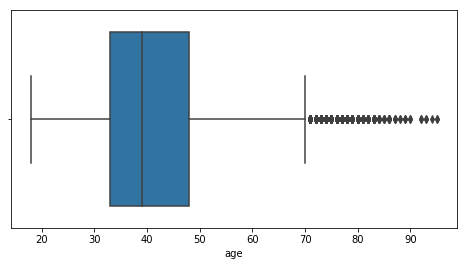

>> Balance box plot before outlier treatment
===> Analysis for balance; Length - 45211
           count         mean          std     min   25%    50%     75%  \
balance  45211.0  1362.272058  3044.765829 -8019.0  72.0  448.0  1428.0   

              max  
balance  102127.0  
IQR - 1356.0, 3462.0, 4712


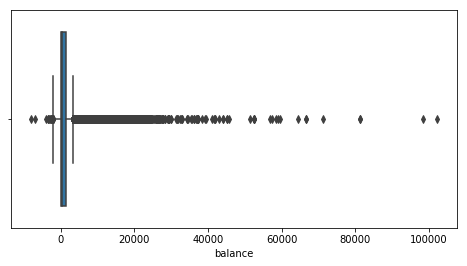

>> Balance box plot after outlier treatment
===> Analysis for balance; Length - 45211
           count        mean          std  min   25%    50%     75%     max
balance  45211.0  959.726704  1148.515651  0.0  72.0  448.0  1428.0  3462.0
IQR - 1356.0, 3462.0, 0


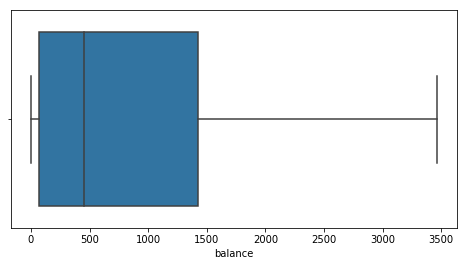

>> duration box plot before outlier treatment
===> Analysis for duration; Length - 45211
            count       mean         std  min    25%    50%    75%     max
duration  45211.0  258.16308  257.527812  0.0  103.0  180.0  319.0  4918.0
IQR - 216.0, 643.0, 3235


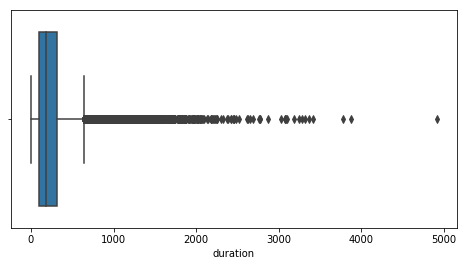

>> duration box plot after outlier treatment
===> Analysis for duration; Length - 45211
            count        mean         std  min    25%    50%    75%    max
duration  45211.0  234.939307  176.749932  0.0  103.0  180.0  319.0  643.0
IQR - 216.0, 643.0, 0


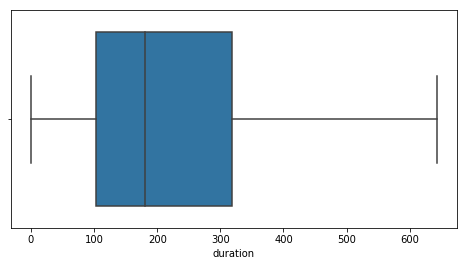

===> Analysis for campaign; Length - 45211
            count      mean       std  min  25%  50%  75%   max
campaign  45211.0  2.763841  3.098021  1.0  1.0  2.0  3.0  63.0
IQR - 2.0, 6.0, 3064


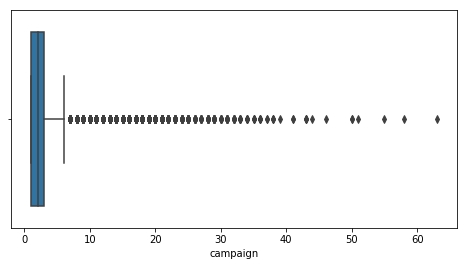

===> Analysis for pdays; Length - 45211
         count       mean         std  min  25%  50%  75%    max
pdays  45211.0  40.197828  100.128746 -1.0 -1.0 -1.0 -1.0  871.0
IQR - 0.0, -1.0, 8257


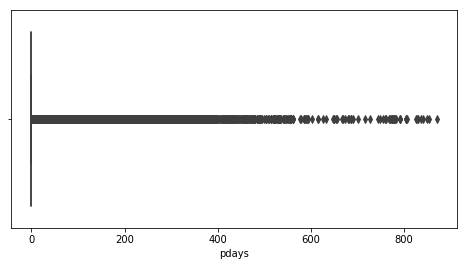

===> Analysis for previous; Length - 45211
            count      mean       std  min  25%  50%  75%    max
previous  45211.0  0.580323  2.303441  0.0  0.0  0.0  0.0  275.0
IQR - 0.0, 0.0, 8257


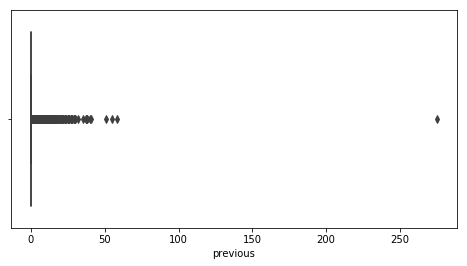

In [16]:
# Age - Going by 1.5 * IQR... there are several outliers in the dataset. Should I retain the 
# outliers or not? Let me take that decision later!!!
BoxPlot(df, 'age')
# Balance - the field represents the balance an individual have. It cannot be a negative value and 
# hence will update the negative value to min value which is 0. also it has a strong presence of 
# outliers. 
print('>> Balance box plot before outlier treatment')
BoxPlot(df, 'balance')
df['balance'] = df['balance'].apply(lambda x : 0 if x < 0 else x)
df['balance'] = df['balance'].apply(lambda x : 3462 if x > 3462 else x)
print('>> Balance box plot after outlier treatment')

BoxPlot(df, 'balance')
# duration - Almost 7% of records are called out as outliers which may not be true. Need more 
# information to cross check this. I am keeping a max of 643 as the max value and treating 
# value above as outlier. 
print('>> duration box plot before outlier treatment')
BoxPlot(df, 'duration')
df['duration'] = df['duration'].apply(lambda x : 643 if x > 643 else x)
print('>> duration box plot after outlier treatment')
BoxPlot(df, 'duration')
# campaign - Almost 7% of records are called out as outliers which may not be true. Need more 
# information to cross check this. 
BoxPlot(df, 'campaign')
# pdays - 999 is a value called out as not contacted however, the data says the possible number would be -1. 
# we would need to treat this column useless as most data is -1 (not contacted). 
BoxPlot(df, 'pdays')
# previous - Going by what we have on the data for this column, its most likely that data is not collected 
# or most data are outliers. Need more information to validate this
BoxPlot(df, 'previous')

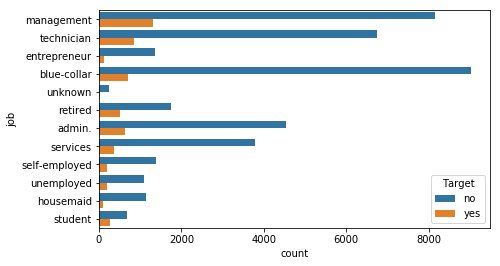

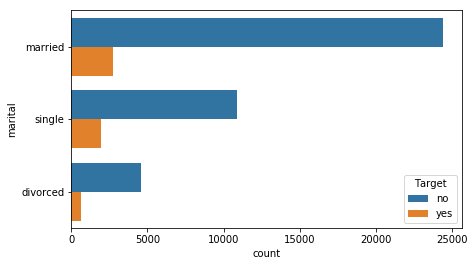

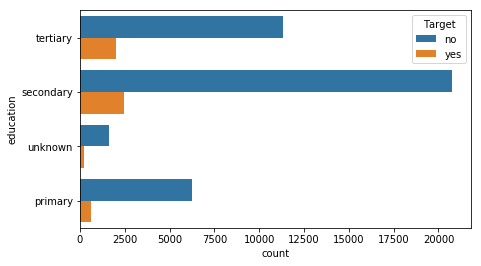

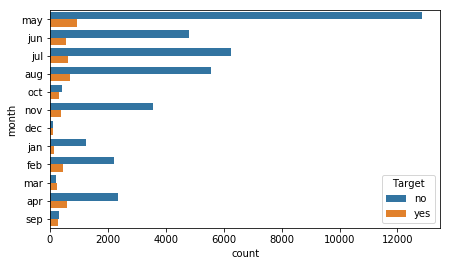

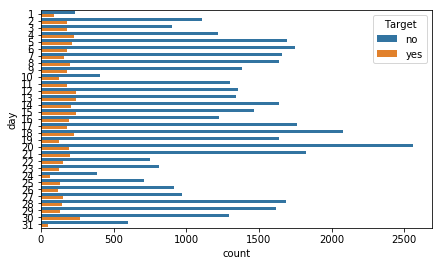

In [17]:
# Analysis for job field - Unknown category count is about 288. Which is nominal list of when
# compared to the whole dataset. Management, technician and blue collar jobs constiture about 
# 50% of over all dataset.
CountPlot(df, 'job')    
# Research focus was mostly on married folks. While single and divorce consitutes only 30% of 
# overall dataset. 
CountPlot(df, 'marital')
# Data on unknown education is only about 4%. 
CountPlot(df, 'education')    
# Most contacts happened during summer.
CountPlot(df, 'month')    
# The material says the day field is the weekday (1 to 5). But the data is not showing 1 thru 31. 
# Cannot compute the week day since no year given. I am planning to take up this column to 
# compute the number of days assuming today is dec 31. The number of days since last connect 
# happened can be a valuable input for ML.   
CountPlot(df, 'day')

In [18]:
# Analysis for month / day. Converting the field to days since 
import datetime
mnth = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
        'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12 }

def NumOfDays(dt):
    return (datetime.date(2019, 12, 31) - datetime.date(2019, mnth[dt[1]], dt[0])).days

df['daysadjusted'] = list(map(NumOfDays, list(zip(df.day, df.month))))

## 5.  Multivariate Analysis

Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes. 

### 5.a.  Scatter Plot

In [19]:
#sb.pairplot(df, hue='Target')
def ScatterPlot(df, cols, c=('r', 'g'), a=0.5):
    fig = plt.figure(figsize=(7,4))
    ax = fig.add_subplot(111)
    plt.scatter(df[df[cols[2]]=='no'][cols[0]], df[df[cols[2]]=='no'][cols[1]], c=c[0], alpha=0.5, marker='*')
    plt.scatter(df[df[cols[2]]=='yes'][cols[0]], df[df[cols[2]]=='yes'][cols[1]], c=c[1], alpha=0.5, marker='o', s=10)
    ax.set_ylabel(cols[1])
    ax.set_xlabel(cols[0])
    ax.set_title('{0} vs {1} (corr - {2})'.format(cols[0], cols[1], 
                                                  df[cols[0]].corr(df[cols[1]])))
    plt.show()
    plt.close(fig)

### 5.b. Violin plot

In [20]:
def ViolinPlot(df, cols):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    sb.violinplot(x=cols[0], y=cols[1], hue=cols[2], data=df)
    plt.show()
    plt.close(fig)

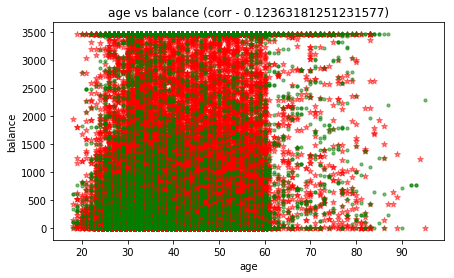

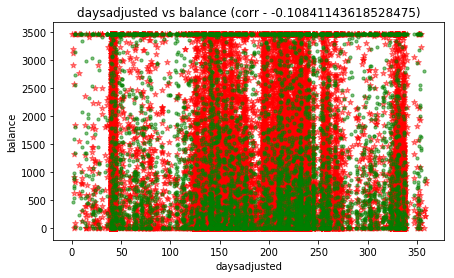

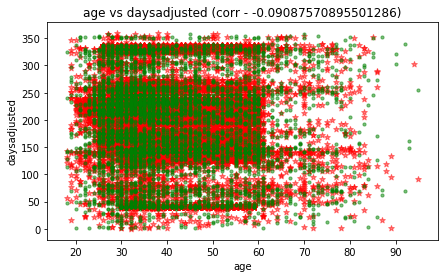

In [21]:
# age vs balance - correlation is 0.124. 
ScatterPlot(df, cols=('age', 'balance', 'Target'))    
# daysadjusted vs balance - correlation is -0.108.
ScatterPlot(df, cols=('daysadjusted', 'balance', 'Target')) 
# age vs daysadjusted - correlation is -0.091.
ScatterPlot(df, cols=('age', 'daysadjusted', 'Target')) 
#['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
# 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
# 'previous', 'poutcome', 'Target', 'daysadjusted']

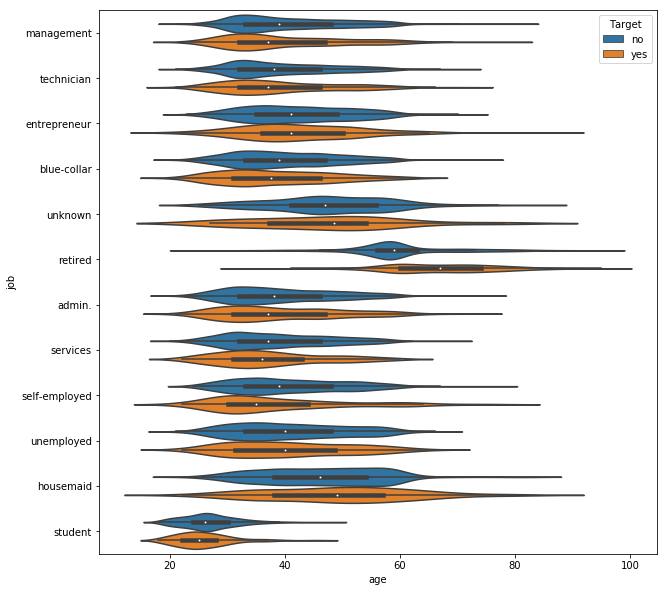

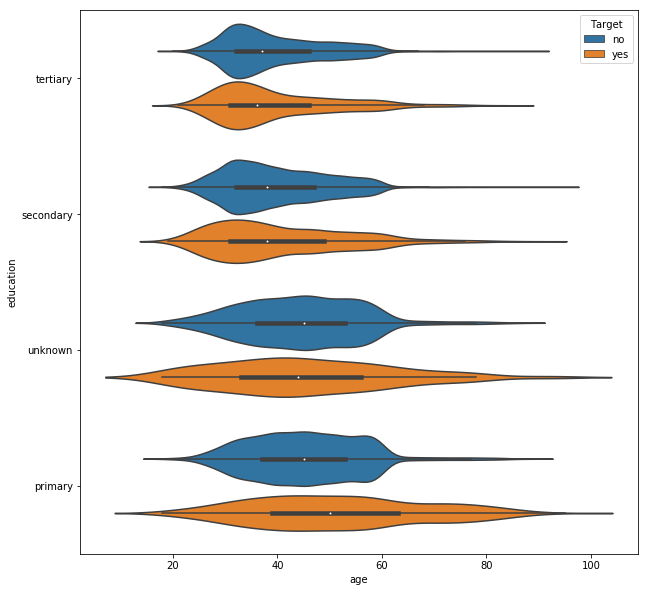

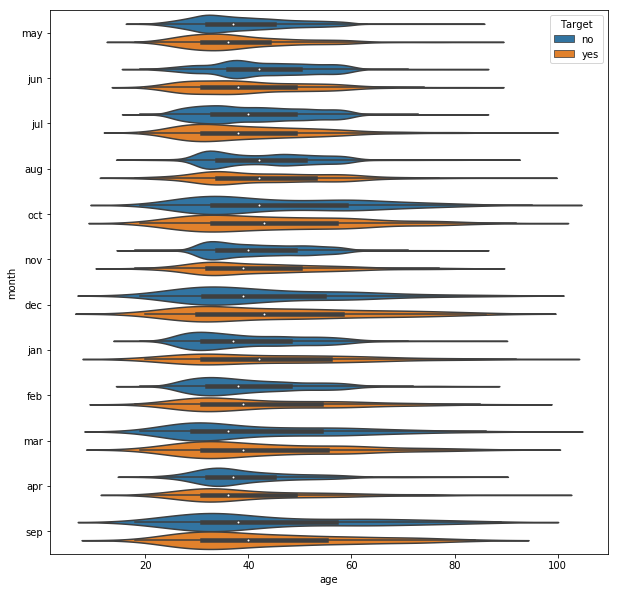

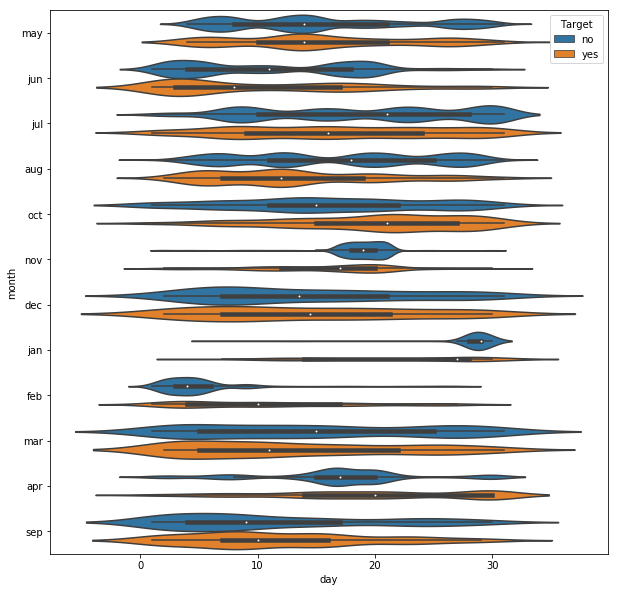

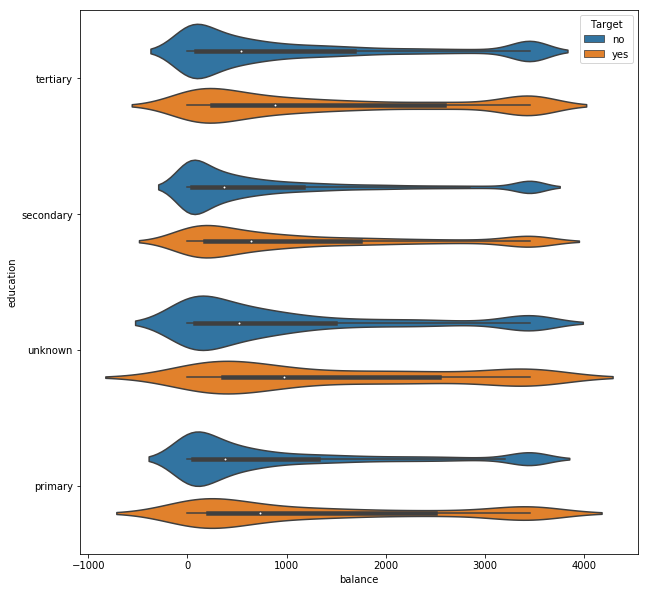

In [22]:
ViolinPlot(df, cols=('age', 'job', 'Target'))
ViolinPlot(df, cols=('age', 'education', 'Target'))
ViolinPlot(df, cols=('age', 'month', 'Target'))
ViolinPlot(df, cols=('day', 'month', 'Target'))
ViolinPlot(df, cols=('balance', 'education', 'Target'))

#['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
# 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
# 'previous', 'poutcome', 'Target', 'daysadjusted']

## 6.  Prepare the data for analytics

1. Load the data into a data-frame. The data-frame should have data and column description.
2. Ensure the attribute types are correct. If not, take appropriate actions.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ration of 70:30

In [23]:
# For now, I am considering the below columns for further analysis. 
# Since we are going for ensemble algorithm, all the object type 
# columns are to be converted to categorical. 
# 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
# 'contact', 'day', 'month', 'duration', 'daysadjusted', 'Target'
# ignoring the columns 'campaign', 'pdays', 'previous', 'poutcome', 

for c in df.columns: 
    if df[c].dtype == 'object': 
        df[c] = pd.Categorical(df[c]).codes
        
X = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
        'contact', 'day', 'month', 'duration', 'daysadjusted']]
y = df['Target']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
len(X_train), len(y_train), len(X_test), len(y_test)

(31647, 31647, 13564, 13564)

## 7. Create the ensemble model

1. Write python code using scikitlearn, pandas, numpy and others in Jupyter notebook to train and test the ensemble model.
2. First create a model using standard classification algorithm. Note the model performance.
3. Use appropriate algorithms and explain why that algorithm in the comment lines.
4. Evaluate the model. Use confusion matrix to evaluate class level metrics i.e..Precision and recall. Also reflect the overall score of the model.
5. Advantages and disadvantages of the algorithm.
6. Build the ensemble models and compare the results with the base model. Note: Random forest can be used only with Decision trees. 

### 7.a.  Decision Tree Classifier

In [25]:
# Creating a Decision Tree classifier to check if thiss can be used for base estimator 
# parameter for adaboosting. I used gini estimator as it provided more accuracy for the data. 
print('===> Decision Tree <===')
dtcl = DecisionTreeClassifier(criterion = 'gini') # entrophy
dtcl.fit(X_train, y_train)
print('Score - {0}'.format(dtcl.score(X_test, y_test)))
y_pred = dtcl.predict(X_test)
print( 'Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_pred))
print('Recall - {0}; Presicion - {1}'. format(recall_score(y_test, y_pred), precision_score(y_test, y_pred)))

===> Decision Tree <===
Score - 0.8715718077263345
Confusion Matrix
[[11092   893]
 [  849   730]]
Recall - 0.4623179227359088; Presicion - 0.44978434996919286


### 7.b.  Logistic Regressor

In [26]:
# Creating a Logistic Regressor classifier to check if thiss can be used for base estimator 
# parameter for adaboosting. 
print('===> Logistic Regression <===')
from sklearn.linear_model import LogisticRegression
lrf = LogisticRegression()
lrf.fit(X_train, y_train)
print('Score - {0}'.format(lrf.score(X_test, y_test)))
y_pred = dtcl.predict(X_test)
print( 'Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_pred))
print('Recall - {0}; Presicion - {1}'. format(recall_score(y_test, y_pred), precision_score(y_test, y_pred)))

===> Logistic Regression <===
Score - 0.8881598348569744
Confusion Matrix
[[11092   893]
 [  849   730]]
Recall - 0.4623179227359088; Presicion - 0.44978434996919286


### 7.c. Bagging Classifier

In [27]:
# Creating a Bagging classifier with a number of estimators as 100 and with 50% samples records for training. 
#
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=100, max_samples=.50)
print('===> Bagging <===')
clf = clf.fit(X_train, y_train)
print('Score - {0}'.format(clf.score(X_test, y_test)))
y_pred = clf.predict(X_test)
print( 'Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_pred))
print('Recall - {0}; Presicion - {1}'. format(recall_score(y_test, y_pred), precision_score(y_test, y_pred)))

===> Bagging <===
Score - 0.897670303745208
Confusion Matrix
[[11484   501]
 [  887   692]]
Recall - 0.4382520582647245; Presicion - 0.5800502933780386


### 7.d. ADA Boost Classifier

In [28]:
# Creating a Bagging classifier with a number of estimators as 100 
# and either logistic regression classifier or decision tree classifier 
# as one of the base parameters for estimation.
from sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier(base_estimator=lrf, n_estimators=100)
clf = AdaBoostClassifier(base_estimator=dtcl, n_estimators=100)
print('===> AdaBoost <===')
clf = clf.fit(X_train, y_train)
print('Score - {0}'.format(clf.score(X_test, y_test)))
y_pred = clf.predict(X_test)
print( 'Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_pred))
print('Recall - {0}; Presicion - {1}'. format(recall_score(y_test, y_pred), precision_score(y_test, y_pred)))

===> AdaBoost <===
Score - 0.8761427307578885
Confusion Matrix
[[11246   739]
 [  941   638]]
Recall - 0.40405319822672575; Presicion - 0.46332607116920843


### 7.d. Gradient Boost Classifier

In [29]:
# Creating a Gradient Boosting classifier with a number of estimators as 50 with a learning 
# rate of 0.2 and max depth for the tree is 6. and either logistic regression classifier or 
# decision tree classifier as one of the base parameters for estimation.
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.2, max_depth=6)
print('===> GradientBoost <===')
clf = clf.fit(X_train, y_train)

print('Score - {0}'.format(clf.score(X_test, y_test)))
y_pred = clf.predict(X_test)
print( 'Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_pred))
print('Recall - {0}; Presicion - {1}'. format(recall_score(y_test, y_pred), precision_score(y_test, y_pred)))

# Results show that this classifier show cases 90% accuracy with a 45% recall score 
# and 60% precision score. The reason why i believe it produces more accurate results is that 
#the learning rate and the hyper parameters flexibility that is available to be tuned.

===> GradientBoost <===
Score - 0.8996608670008847
Confusion Matrix
[[11487   498]
 [  863   716]]
Recall - 0.45345155161494616; Presicion - 0.5897858319604613


### 7.e. Random Forest Classifier

In [30]:
# Creating a Random forest classifier with a number of estimators as 100 
# and either logistic regression classifier or decision tree classifier 
# as one of the base parameters for estimation.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, criterion='entropy')
print('===> Random Forest <===')
clf = clf.fit(X_train, y_train)
print('Score - {0}'.format(clf.score(X_test, y_test)))
y_pred = clf.predict(X_test)
print( 'Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_pred))
print('Recall - {0}; Presicion - {1}'. format(recall_score(y_test, y_pred), precision_score(y_test, y_pred)))

#Random forest also produced a good score 90% accuracy with 60% precision and 39% recall.

===> Random Forest <===
Score - 0.8981126511353583
Confusion Matrix
[[11574   411]
 [  971   608]]
Recall - 0.3850538315389487; Presicion - 0.5966633954857704
